**Run Data 1030 Environment**

In [97]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep 14 2021, 01:18:03) 
[Clang 11.1.0 ]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


**Read Data**

In [143]:
# imports pandas package
import pandas as pd
# imports numpy package
import numpy as np
# imports matplotlib package
import matplotlib
# imports pylab from matplotlib
from matplotlib import pylab as plt
# imports train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# imports KFold from sklearn.model_selection
from sklearn.model_selection import KFold
# imports ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer
# imports Pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline
# imports StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# converts data in the excel file into pandas dataframe
df = pd.read_csv(r'/Users/jamesro/Documents/DATA1030-Fall2021/Data-1030-Project/Student Performance Data/student-mat.csv',sep=';')
# converts G3 into binary scale
pass_final = df.G3 >= 10
fail_final = df.G3 < 10
df.loc[pass_final,'G3'] = 1
df.loc[fail_final,'G3'] = 0
# converts G1 into binary scale
pass_first = df.G1 >= 10
fail_first = df.G1 < 10
df.loc[pass_first,'G1'] = 1
df.loc[fail_first,'G1'] = 0
# converts G2 into binary scale
pass_sec = df.G2 >= 10
fail_sec = df.G2 < 10
df.loc[pass_sec,'G2'] = 1
df.loc[fail_sec,'G2'] = 0
# prints dataframe
print(df)



    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

**Exploratory Data Analysis**

number of rows:  395
number of columns:  33
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
G3: Categorical
1    265
0    130
Name: G3, dtype: int64


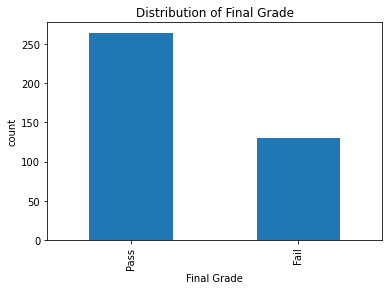

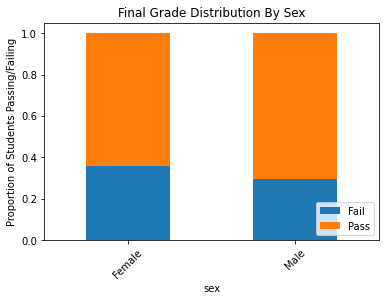

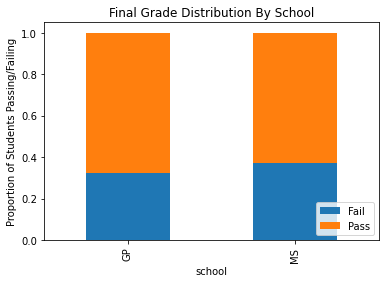

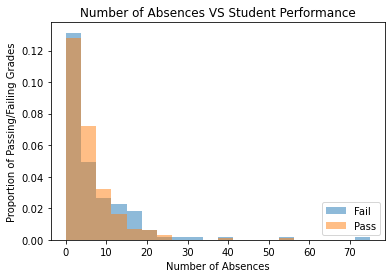

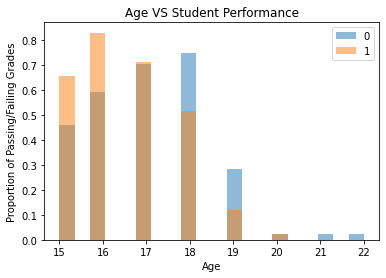

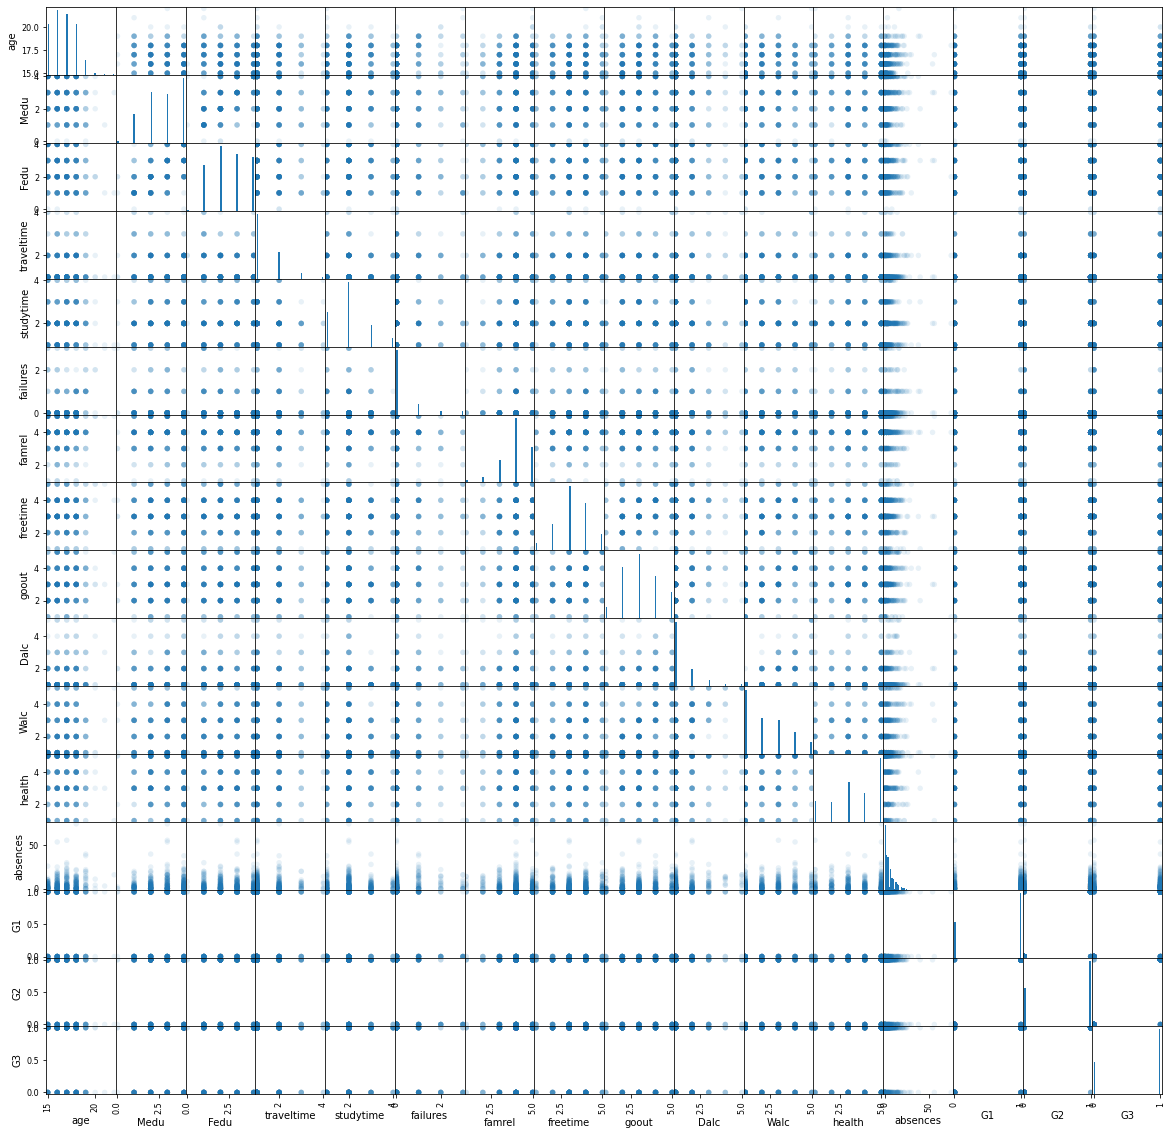

In [145]:
# prints the number of rows
print('number of rows: ' , df.shape[0])
# prints the number of columns
print('number of columns: ' , df.shape[1])

# prints data types of all columns
print(df.dtypes)

# checks if User has less than 17 unique values and if its dtype is an object
if df['G3'].nunique() <= 15 or df['G3'].dtypes == "object":
    # if true, it is categorical
    print('G3' + ": Categorical")
    # describes categorical data
    print(df['G3'].value_counts())
else:
    # if not true, it is continuous
    print('G3' + ": Continuous")
    # describes continuous data
    print(df['G3'].describe())

# plots bar plot of G3, since it is categorical
pd.value_counts(df['G3']).plot.bar()
plt.ylabel('count')
plt.xlabel('Final Grade')
plt.title('Distribution of Final Grade')
plt.xticks([0,1],['Pass','Fail'])
plt.savefig('Figures/Final_Distribution.jpg')
plt.show()

# plots stacked bar plot of sex and G3
count_matrix = df.groupby(['sex', 'G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
objects = ('Fail', 'Pass')
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Students Passing/Failing')
plt.legend(labels=objects,loc=4)
plt.xticks([0,1],['Female','Male'],rotation=45)
plt.title('Final Grade Distribution By Sex')
plt.savefig('Figures/SEX-GRADE.jpg')
plt.show()

# plots stacked bar plot of school and G3
count_matrix = df.groupby(['school', 'G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Students Passing/Failing')
plt.legend(labels=objects,loc=4)
plt.title('Final Grade Distribution By School')
plt.savefig('Figures/SCHOOL-GRADE.jpg')
plt.show()

# plots category-specific histogram of absences and G3
categories = df['G3'].unique()
bin_range = (df['absences'].min(),df['absences'].max())

for c in categories:
    plt.hist(df[df['G3']==c]['absences'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Proportion of Passing/Failing Grades')
plt.xlabel('Number of Absences')
plt.legend(labels=objects,loc=4)
plt.title('Number of Absences VS Student Performance')
plt.savefig('Figures/ABSENCE-GRADE.jpg')
plt.show()

# plots category-specific histogram of age and G3 
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['G3']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Proportion of Passing/Failing Grades')
plt.xlabel('Age')
plt.title('Age VS Student Performance')
plt.savefig('Figures/AGE-GRADE.jpg')
plt.show()

# plots scatter matrix
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(20, 20), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.savefig('Figures/SCATTERMATRIX.jpg')
plt.show()




**Data Splitting/Preprocessing**

In [114]:
# defines random_state as 42
random_state = 42
# defines X as all feature columns
X = df.loc[:, df.columns != 'G3']
# defines y as the target variable Y
y = df['G3']

# use train_test_split to split into X_train, y_train
#X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state)
# use train_test_split to split the remaining into X_val, y_val, X_test, y_test
#X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state = random_state)  

# prints head of X_train
#print(X_train.head())
# prints head of X_val
#print(X_val.head())
# prints head of X_test
#print(X_test.head())


# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
#print(X_other.shape,y_other.shape)
#print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(X_train.head())
    print(X_val.head())
    print(X_test.head())
    #print('   training set:',X_train.shape, y_train.shape) 
    #print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    #print(X_val[['age','workclass','education']].head())
    onehot_ftrs = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
    minmax_ftrs = ['age','absences','G1','G2']
    std_ftrs = ['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health']

    # collects all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            #('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('minmax', MinMaxScaler(), minmax_ftrs),
            ('std', StandardScaler(), std_ftrs)
            ])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    # transforms X_train into X_train_prep
    X_train_prep = clf.fit_transform(X_train)
    # transforms X_val into X_val_prep
    X_val_prep = clf.transform(X_val)
    # transforms X_test into X_test_prep
    X_test_prep = clf.transform(X_test)

    # prints X_train_prep
    print(X_train_prep)
    # prints X_val_prep
    print(X_val_prep)
        # prints X_test_prep
    print(X_test_prep)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
181     GP   M   16       U     GT3       T     3     3  services     other   
194     GP   M   16       U     GT3       T     2     3     other     other   
173     GP   F   16       U     GT3       T     1     3   at_home  services   
253     GP   M   16       R     GT3       T     2     1     other     other   
331     GP   F   17       R     GT3       T     2     4   at_home     other   

     ... romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
181  ...      yes      4         2      3     1    2      3        2  12  13  
194  ...       no      5         3      3     1    1      3        0  13  14  
173  ...      yes      4         3      5     1    1      3        0   8   7  
253  ...       no      3         3      2     1    3      3        0   8   9  
331  ...      yes      4         4      3     1    1      5        7  12  14  

[5 rows x 32 columns]
    school sex  age address 

[5 rows x 32 columns]
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
78      GP   M   17       U     GT3       T     2     1     other     other   
371     MS   M   18       R     LE3       T     1     2   at_home  services   
248     GP   M   18       R     LE3       T     3     3     other  services   
55      GP   F   16       U     GT3       A     2     1     other     other   
390     MS   M   20       U     LE3       A     2     2  services  services   

     ... romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
78   ...       no      4         5      1     1    1      3        2   8   8  
371  ...      yes      4         3      3     2    3      3        3  14  12  
248  ...      yes      4         3      3     1    3      5        8   3   5  
55   ...      yes      5         3      4     1    1      2        8   8   9  
390  ...       no      5         5      4     4    5      4       11   9   9  

[5 rows x 32 columns]
[[ 1. 